In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [163]:
df = pd.read_csv('file:///C:/Users/jaswa/Downloads/archive/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [164]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [165]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [166]:
df.Species=df.Species.map({'Iris-virginica':0,'Iris-setosa':1,'Iris-versicolor':2})

In [167]:
x=df.iloc[:,1:3].values
y=df.iloc[:,-1].values


In [168]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [178]:
from sklearn.metrics import confusion_matrix,classification_report
def val(algo,xtrain=xtrain,xtest=xtest,ytrain=ytrain,ytest=ytest):
    
    algo.fit(xtrain,ytrain)
    
    ytrp = algo.predict(xtrain)
    ytrpa = algo.predict_proba(xtrain)[:,1]
    
    ytep = algo.predict(xtest)
    ytepa = algo.predict_proba(xtest)[:,1]
    
    print('Training')
    print('confusion_matrix:\n',confusion_matrix(ytrain,ytrp))
    print('accuracy_score: ', accuracy_score(ytrain,ytrp))
    print('classification_report\n',classification_report(ytrain,ytrp))
    
    
    print('-'*100)
    
    print('Testing')
    print('confusion_matrix:\n',confusion_matrix(ytest,ytep))
    print('accuracy_score: ', accuracy_score(ytest,ytep))
    print('classification_report\n',classification_report(ytest,ytep))
   

In [224]:
knn = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)

In [225]:
val(knn)

Training
confusion_matrix:
 [[35  0  4]
 [ 0 34  0]
 [ 2  0 30]]
accuracy_score:  0.9428571428571428
classification_report
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       1.00      1.00      1.00        34
           2       0.88      0.94      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

----------------------------------------------------------------------------------------------------
Testing
confusion_matrix:
 [[ 5  0  6]
 [ 0 16  0]
 [ 9  0  9]]
accuracy_score:  0.6666666666666666
classification_report
               precision    recall  f1-score   support

           0       0.36      0.45      0.40        11
           1       1.00      1.00      1.00        16
           2       0.60      0.50      0.55        18

    accuracy                           0.67        45

In [226]:
a=np.arange(start=xtrain[:,0].min()-1, stop=xtrain[:,0].max()+1, step=0.01)
b=np.arange(start=xtrain[:,1].min()-1, stop=xtrain[:,1].max()+1, step=0.01)

XX,YY=np.meshgrid(a,b)

In [227]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

In [228]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['red', 'green', 'blue'])

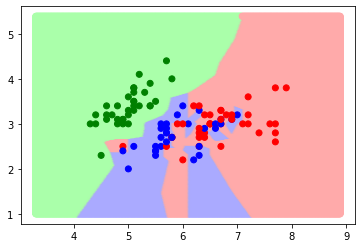

In [229]:
plt.scatter(XX,YY, c = labels.reshape(XX.shape), cmap=cmap_light)
plt.scatter(xtrain[:,0],xtrain[:,1], c=ytrain,cmap=cmap_bold)

In [196]:
x.shape

(150, 2)

In [197]:
np.sqrt(x.shape[0])

12.24744871391589

k=  3 weights=  uniform
Training
confusion_matrix:
 [[35  0  4]
 [ 1 33  0]
 [10  0 22]]
accuracy_score:  0.8571428571428571
classification_report
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        39
           1       1.00      0.97      0.99        34
           2       0.85      0.69      0.76        32

    accuracy                           0.86       105
   macro avg       0.87      0.85      0.86       105
weighted avg       0.86      0.86      0.86       105

----------------------------------------------------------------------------------------------------
Testing
confusion_matrix:
 [[ 9  0  2]
 [ 0 16  0]
 [10  0  8]]
accuracy_score:  0.7333333333333333
classification_report
               precision    recall  f1-score   support

           0       0.47      0.82      0.60        11
           1       1.00      1.00      1.00        16
           2       0.80      0.44      0.57        18

    accuracy                 

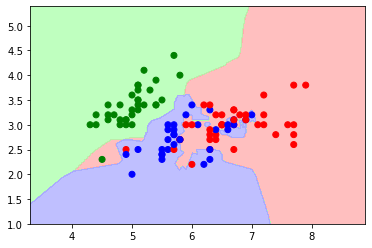

k=  3 weights=  distance
Training
confusion_matrix:
 [[39  0  0]
 [ 0 34  0]
 [ 6  0 26]]
accuracy_score:  0.9428571428571428
classification_report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        39
           1       1.00      1.00      1.00        34
           2       1.00      0.81      0.90        32

    accuracy                           0.94       105
   macro avg       0.96      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105

----------------------------------------------------------------------------------------------------
Testing
confusion_matrix:
 [[ 7  0  4]
 [ 0 16  0]
 [11  0  7]]
accuracy_score:  0.6666666666666666
classification_report
               precision    recall  f1-score   support

           0       0.39      0.64      0.48        11
           1       1.00      1.00      1.00        16
           2       0.64      0.39      0.48        18

    accuracy                

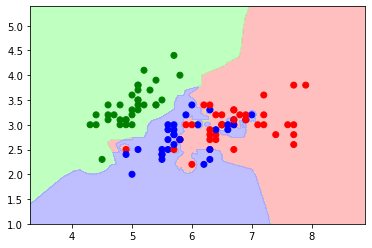

k=  6 weights=  uniform
Training
confusion_matrix:
 [[33  0  6]
 [ 0 33  1]
 [13  0 19]]
accuracy_score:  0.8095238095238095
classification_report
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        39
           1       1.00      0.97      0.99        34
           2       0.73      0.59      0.66        32

    accuracy                           0.81       105
   macro avg       0.82      0.80      0.81       105
weighted avg       0.81      0.81      0.81       105

----------------------------------------------------------------------------------------------------
Testing
confusion_matrix:
 [[ 9  0  2]
 [ 0 16  0]
 [12  0  6]]
accuracy_score:  0.6888888888888889
classification_report
               precision    recall  f1-score   support

           0       0.43      0.82      0.56        11
           1       1.00      1.00      1.00        16
           2       0.75      0.33      0.46        18

    accuracy                 

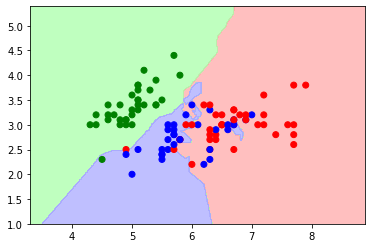

k=  6 weights=  distance
Training
confusion_matrix:
 [[39  0  0]
 [ 0 34  0]
 [ 6  0 26]]
accuracy_score:  0.9428571428571428
classification_report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        39
           1       1.00      1.00      1.00        34
           2       1.00      0.81      0.90        32

    accuracy                           0.94       105
   macro avg       0.96      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105

----------------------------------------------------------------------------------------------------
Testing
confusion_matrix:
 [[ 7  0  4]
 [ 0 16  0]
 [11  0  7]]
accuracy_score:  0.6666666666666666
classification_report
               precision    recall  f1-score   support

           0       0.39      0.64      0.48        11
           1       1.00      1.00      1.00        16
           2       0.64      0.39      0.48        18

    accuracy                

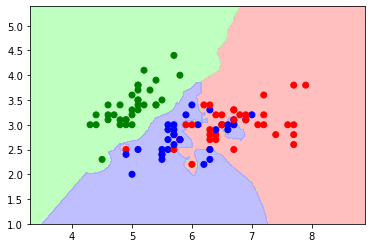

k=  12 weights=  uniform
Training
confusion_matrix:
 [[33  1  5]
 [ 0 34  0]
 [13  0 19]]
accuracy_score:  0.819047619047619
classification_report
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        39
           1       0.97      1.00      0.99        34
           2       0.79      0.59      0.68        32

    accuracy                           0.82       105
   macro avg       0.83      0.81      0.81       105
weighted avg       0.82      0.82      0.81       105

----------------------------------------------------------------------------------------------------
Testing
confusion_matrix:
 [[ 9  0  2]
 [ 0 16  0]
 [10  0  8]]
accuracy_score:  0.7333333333333333
classification_report
               precision    recall  f1-score   support

           0       0.47      0.82      0.60        11
           1       1.00      1.00      1.00        16
           2       0.80      0.44      0.57        18

    accuracy                 

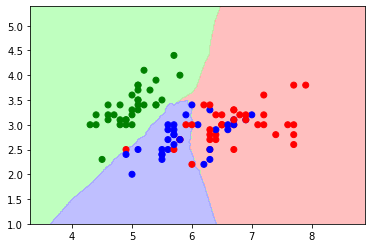

k=  12 weights=  distance
Training
confusion_matrix:
 [[39  0  0]
 [ 0 34  0]
 [ 6  0 26]]
accuracy_score:  0.9428571428571428
classification_report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        39
           1       1.00      1.00      1.00        34
           2       1.00      0.81      0.90        32

    accuracy                           0.94       105
   macro avg       0.96      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105

----------------------------------------------------------------------------------------------------
Testing
confusion_matrix:
 [[ 6  0  5]
 [ 0 16  0]
 [12  0  6]]
accuracy_score:  0.6222222222222222
classification_report
               precision    recall  f1-score   support

           0       0.33      0.55      0.41        11
           1       1.00      1.00      1.00        16
           2       0.55      0.33      0.41        18

    accuracy               

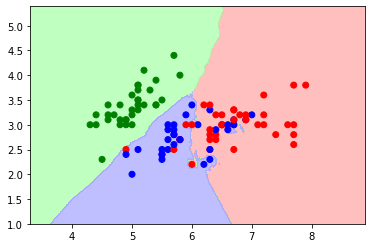

In [203]:
for k in [3,6,12]:
    for m in ['uniform', 'distance']:
        print('k= ',k,'weights= ',m)
        knn = KNeighborsClassifier(n_neighbors=k, weights=m,n_jobs=-1)
        val(knn)
        a=np.arange(start=xtrain[:,0].min()-1, stop=xtrain[:,0].max()+1, step=0.01)
        b=np.arange(start=xtrain[:,1].min()-1, stop=xtrain[:,1].max()+1, step=0.01)
        XX,YY=np.meshgrid(a,b)
        input_array=np.array([XX.ravel(),YY.ravel()]).T
        labels=knn.predict(input_array)
        plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75,cmap=cmap_light)
        plt.scatter(xtrain[:,0],xtrain[:,1], c=ytrain,cmap=cmap_bold)
        plt.show()